In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut

(train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.mnist.load_data()

train_X = train_X / 255.0

train_X, _, train_Y, _ = train_test_split(train_X, train_Y, test_size=0.9, random_state=525)

train_X = np.reshape(train_X, (6000, 28*28))

loo = LeaveOneOut()

accuracies = []

for k in range(1, 11):
  knn = KNeighborsClassifier(n_neighbors=k)
  good_pred = 0
  for train_index, test_index in loo.split(train_X):
    tr_X, ts_X = train_X[train_index], train_X[test_index]
    tr_Y, ts_Y = train_Y[train_index], train_Y[test_index]

    knn.fit(tr_X, tr_Y)
    y_pred = knn.predict(ts_X)

    if y_pred == ts_Y:
      good_pred += 1

  acc = good_pred / len(train_X)
  accuracies.append(acc)
  print(f"Accuracy for k={k}: {acc:7f}")



Accuracy for k=1: 0.931333
Accuracy for k=2: 0.918167
Accuracy for k=3: 0.932167
Accuracy for k=4: 0.928333
Accuracy for k=5: 0.929500
Accuracy for k=6: 0.927333
Accuracy for k=7: 0.928167
Accuracy for k=8: 0.926000
Accuracy for k=9: 0.923833
Accuracy for k=10: 0.922833


Optimal k is: 3


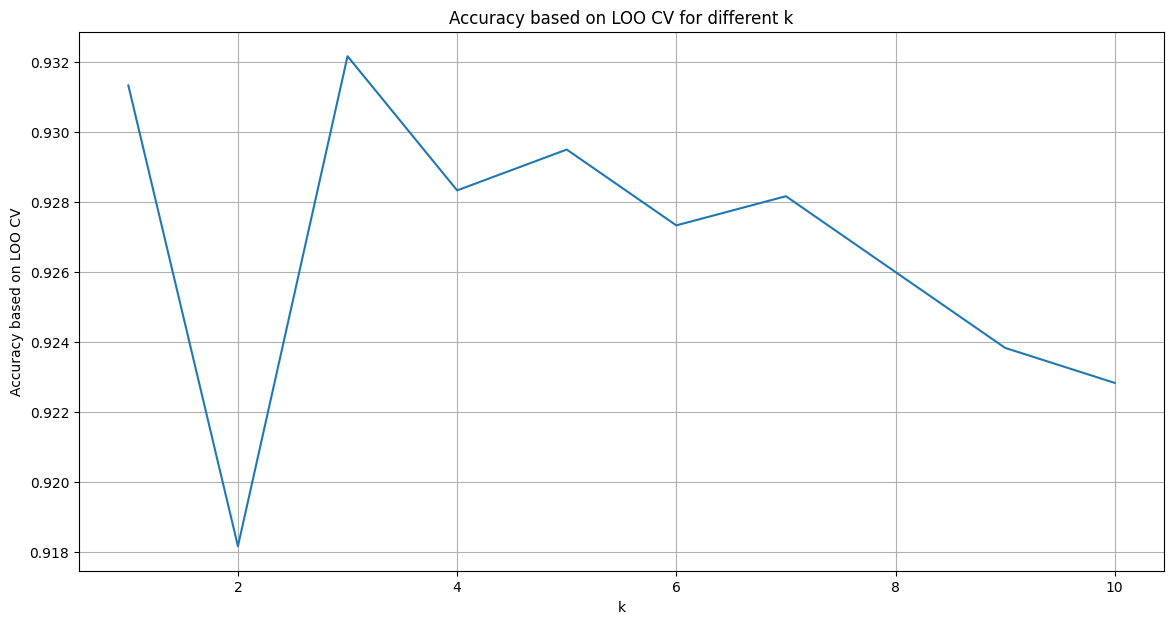

In [ ]:
optimal_k = np.argmax(accuracies) + 1
print(f"Optimal k is: {optimal_k}")


plt.figure(figsize=(14,7))
plt.plot(range(1, 11), accuracies)
plt.xlabel("k")
plt.ylabel("Accuracy based on LOO CV")
plt.title("Accuracy based on LOO CV for different k")
plt.grid()
plt.show()